# BoomBikes Bike Sharing Assignment

#### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands
   
Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

- Steps followed as below:
  1. Reading, Pre-Processing, Udersatnding and Visualising Data
  2. Preparing the data for modeling
  3. Training the model
  4. Residual Analysis
  5. Predictions and Evaluations 


## 1. Reading, Pre-Processing, Udersatnding and Visualising Data

In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### 1.1 Reading Data

In [313]:
#reading data
boomBikes = pd.read_csv('day.csv')
boomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1.2 Pre-Processing

In [314]:
#dropping redunaant and unnecessary columns
boomBikes.drop(columns=['instant','casual','registered','dteday'],axis=1, inplace=True)
boomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [315]:
boomBikes.shape

(730, 12)

In [316]:
boomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [317]:
#checking missing values
boomBikes.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [318]:
#converting weathersit as categorical variable

weathersit_mapping= {
    1: 'Clear',
    2: 'Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
boomBikes['weathersit']=boomBikes['weathersit'].map(weathersit_mapping)


In [319]:
boomBikes['weathersit']=boomBikes['weathersit'].astype('category')

In [320]:
boomBikes['weathersit'].value_counts()

weathersit
Clear              463
Cloudy             246
Light Snow/Rain     21
Name: count, dtype: int64

In [321]:
#converting season as categorical variable 
season_mapping={1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
boomBikes['season']=boomBikes['season'].map(season_mapping)


In [322]:
boomBikes['season']=boomBikes['season'].astype('category')

In [323]:
boomBikes['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [324]:
#converting weekday as categorical variable 
weekday_mapping={0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
               4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

boomBikes['weekday']=boomBikes['weekday'].map(weekday_mapping)


In [325]:
boomBikes['weekday']=boomBikes['weekday'].astype('category')

In [326]:
boomBikes['weekday'].value_counts()

weekday
Monday       105
Saturday     105
Sunday       105
Friday       104
Thursday     104
Tuesday      104
Wednesday    103
Name: count, dtype: int64

In [327]:
#converting season as categorical variable 
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 
    5: 'May', 6: 'June', 7: 'July', 8: 'August', 
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
boomBikes['mnth']=boomBikes['mnth'].map(month_mapping)

In [328]:
boomBikes['mnth']=boomBikes['mnth'].astype('category')

In [329]:
boomBikes['mnth'].value_counts()

mnth
August       62
December     62
July         62
January      62
October      62
May          62
March        62
April        60
November     60
June         60
September    60
February     56
Name: count, dtype: int64

In [330]:
boomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


### 1.4 Visualization

<Figure size 20000x10000 with 0 Axes>

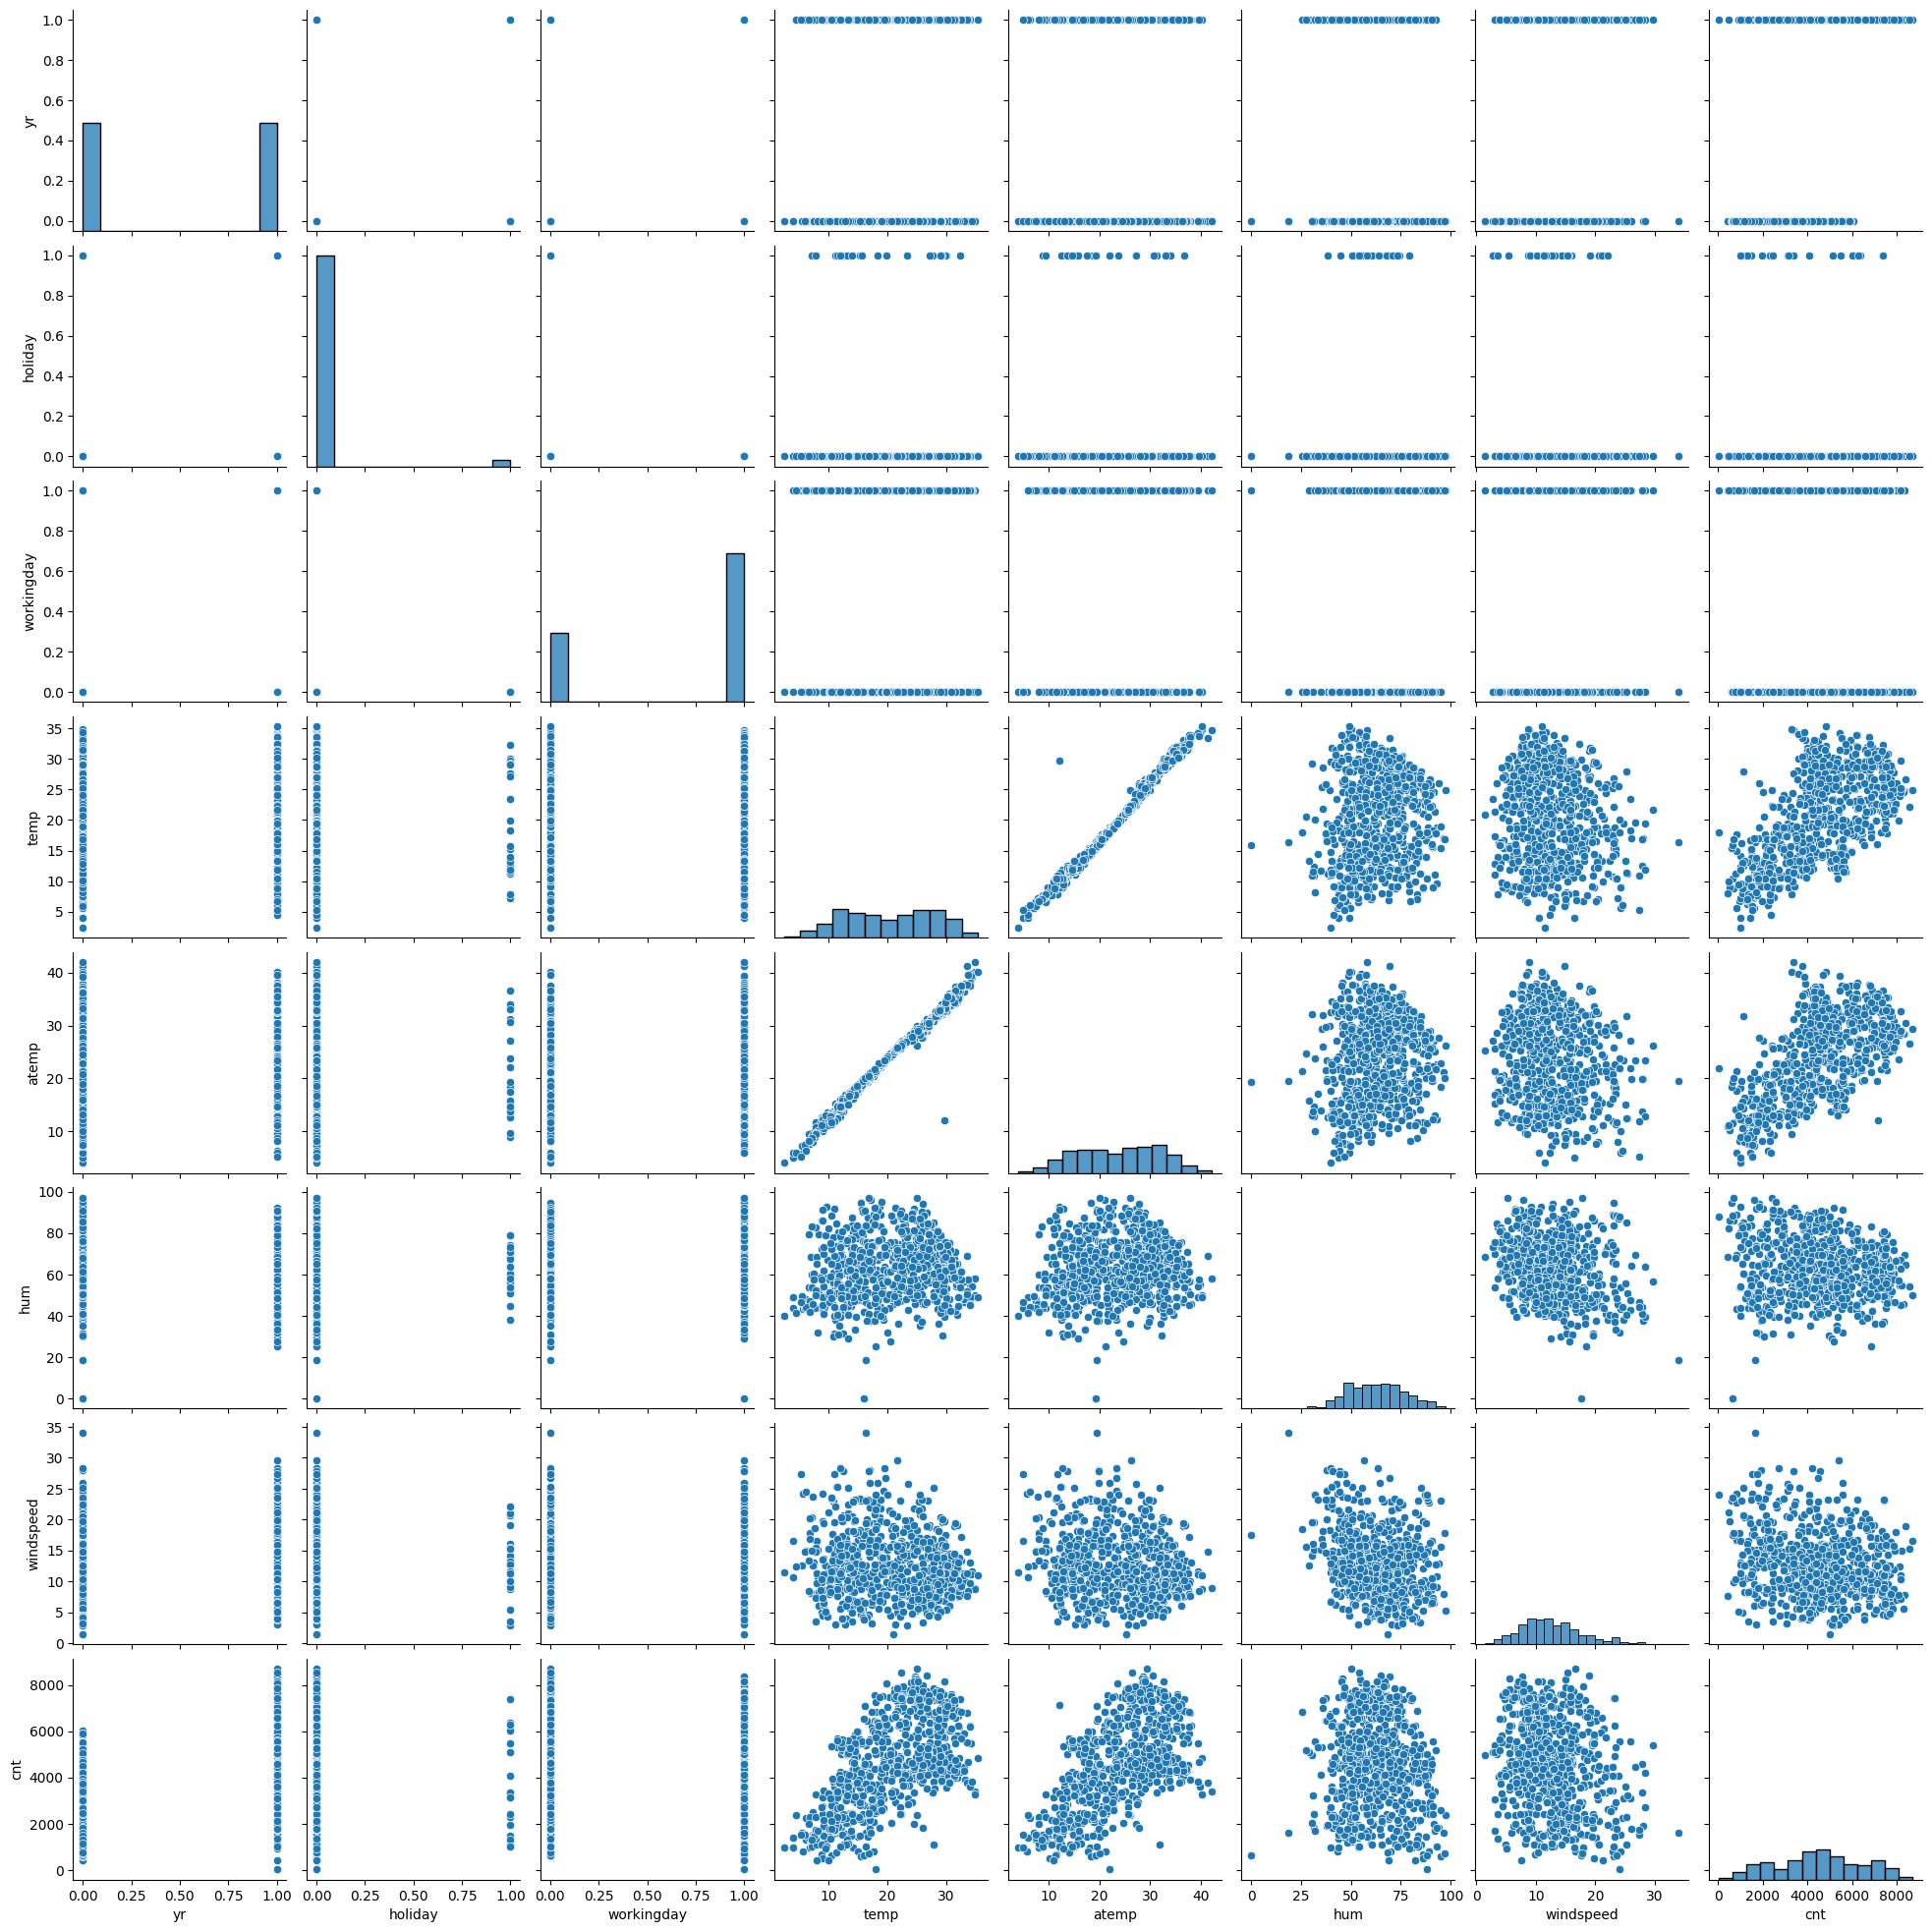

In [331]:
#visualizing numerical variables
plt.figure(figsize=(200,100))

sns.pairplot(boomBikes,palette='husl')
plt.show()

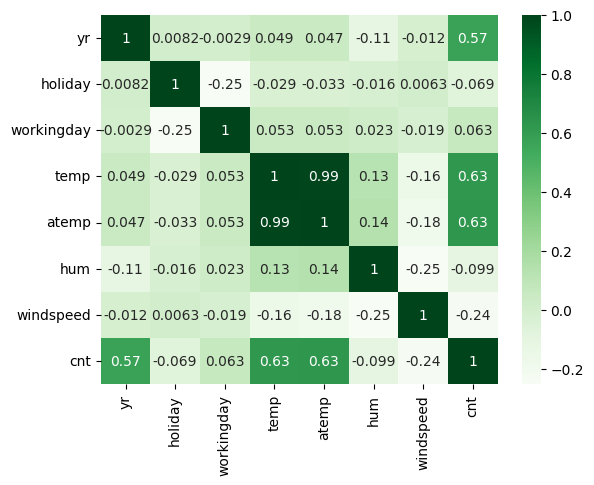

In [332]:
#heatmap to understand Corelation 
boomBikes_numerical=boomBikes[['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt']]
sns.heatmap(boomBikes_numerical.corr(),annot=True,cmap='Greens')
plt.show()

- Inference
  1. `temp` and `atemp` has high corealtion we can drop any one of these 2 columns
  2. `humidity` and `windspeed` has negative corealtion with `cnt`


In [333]:
#Dropping atemp
boomBikes.drop(columns=['atemp'],axis=1, inplace=True)

In [334]:
boomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


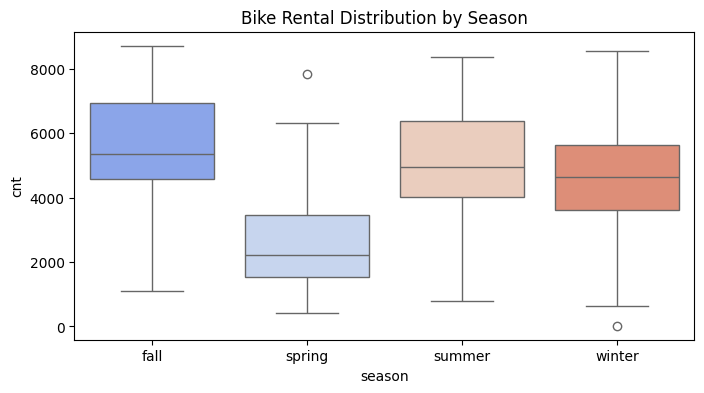

In [335]:
#visualising categorical variables

plt.figure(figsize=(8, 4))
sns.boxplot(x='season', y='cnt', data=boomBikes, palette='coolwarm')
plt.title('Bike Rental Distribution by Season')
plt.show()

##### Inference
- Fall season has highest Bike rentals .
- spring season has lowest Bike rentals.

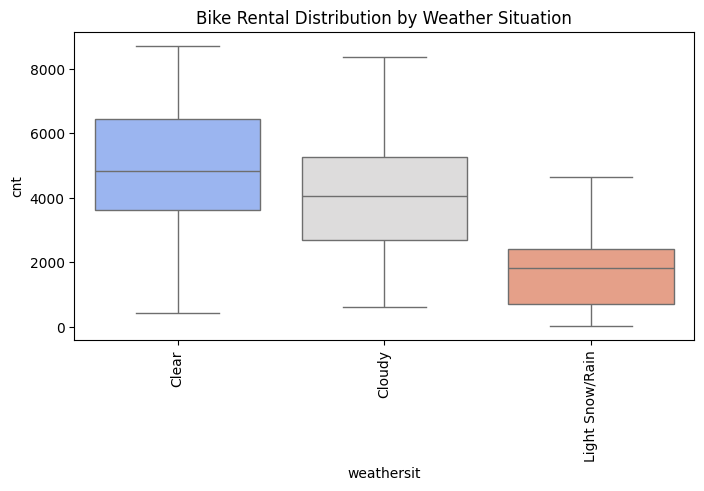

In [336]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='weathersit', y='cnt', data=boomBikes, palette='coolwarm')
plt.title('Bike Rental Distribution by Weather Situation')
plt.xticks(rotation=90)
plt.show()

##### Inference
- There are no Bike rentals in 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' weather condition.
- Highest Bike Rentals in 'Clear, Few clouds, Partly cloudy, Partly cloudy' weather condition.
- Lowest Bike Rentals in 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds' weather condition.

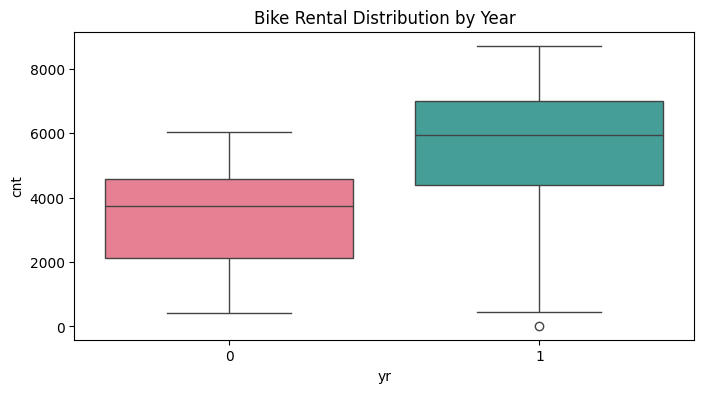

In [337]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='yr', y='cnt', data=boomBikes, palette='husl')
plt.title('Bike Rental Distribution by Year')
plt.show()

##### Inference
- Bike rentals have increased significantly in 2019.

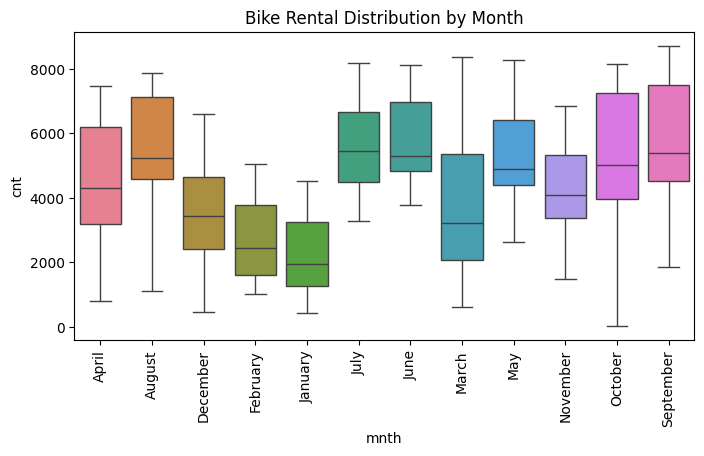

In [338]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='mnth', y='cnt', data=boomBikes, palette='husl')
plt.title('Bike Rental Distribution by Month')
plt.xticks(rotation=90)
plt.show()

##### Inference
- September has highest Bike Renatls.
- January has loweset Bike Renatls.

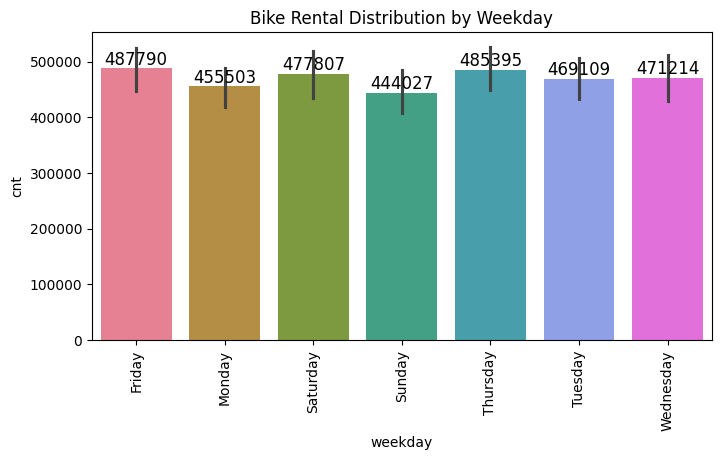

In [339]:
plt.figure(figsize=(8, 4))
ax=sns.barplot(x='weekday',y='cnt',data=boomBikes,estimator=sum, palette='husl')
plt.title('Bike Rental Distribution by Weekday')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Text (height of the bar)
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position (center of the bar)
                ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=90)
plt.show()

##### Inference
- Friday has highest Bike Renatls.
- Sunday has loweset Bike Renatls.

## 2. Preparing the data for modeling

In [340]:
boomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


### 2.1 Creating Dummy Variables


In [341]:
season_d=pd.get_dummies(boomBikes['season'], dtype=int,drop_first=True)
season_d

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [342]:
month_d=pd.get_dummies(boomBikes['mnth'], dtype=int,drop_first=True)
month_d

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [343]:
weekday_d=pd.get_dummies(boomBikes['weekday'], dtype=int,drop_first=True)
weekday_d

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


In [344]:
weathersit_d=pd.get_dummies(boomBikes['weathersit'], dtype=int,drop_first=True)
weathersit_d

,Cloudy,Light Snow/Rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


### 2.2 Concat Dummy Variables

In [345]:
boomBikes=pd.concat([boomBikes,season_d,month_d,weekday_d,weathersit_d], axis=1)

In [346]:
boomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   season           730 non-null    category
 1   yr               730 non-null    int64   
 2   mnth             730 non-null    category
 3   holiday          730 non-null    int64   
 4   weekday          730 non-null    category
 5   workingday       730 non-null    int64   
 6   weathersit       730 non-null    category
 7   temp             730 non-null    float64 
 8   hum              730 non-null    float64 
 9   windspeed        730 non-null    float64 
 10  cnt              730 non-null    int64   
 11  spring           730 non-null    int64   
 12  summer           730 non-null    int64   
 13  winter           730 non-null    int64   
 14  August           730 non-null    int64   
 15  December         730 non-null    int64   
 16  February         730 non-null    int64   
 1

In [347]:
#removing previous columns of season, mnth, weekday and weathersit
boomBikes.drop(['season','mnth','weekday','weathersit'], axis=1,inplace=True)
boomBikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow/Rain
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### 2.3 Splitting into train and test

In [348]:
boomBikes_train, boomBikes_test=train_test_split(boomBikes, train_size=0.7, random_state=100)

In [349]:
boomBikes_train.shape

(510, 29)

In [350]:
boomBikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow/Rain
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [351]:
boomBikes_test.shape

(220, 29)

In [352]:
boomBikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow/Rain
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### 2.4 Rescaling Training Data Set

Using Min Max Scaling for Numerical variables `temp`,`hum`,`windspeed`,`cnt`


In [353]:
#instanciate
scaler=MinMaxScaler()

#create a list of numerical variables
numerical_columns=['temp','hum','windspeed','cnt']

#fit on data
boomBikes_train[numerical_columns]=scaler.fit_transform(boomBikes_train[numerical_columns])


In [354]:
boomBikes_train[numerical_columns].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


In [355]:
boomBikes_train[numerical_columns].head()

,temp,hum,windspeed,cnt
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


In [356]:
boomBikes_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   hum              510 non-null    float64
 5   windspeed        510 non-null    float64
 6   cnt              510 non-null    float64
 7   spring           510 non-null    int64  
 8   summer           510 non-null    int64  
 9   winter           510 non-null    int64  
 10  August           510 non-null    int64  
 11  December         510 non-null    int64  
 12  February         510 non-null    int64  
 13  January          510 non-null    int64  
 14  July             510 non-null    int64  
 15  June             510 non-null    int64  
 16  March            510 non-null    int64  
 17  May              51

## 3. Training the model


### 3.1 Checking Corelation

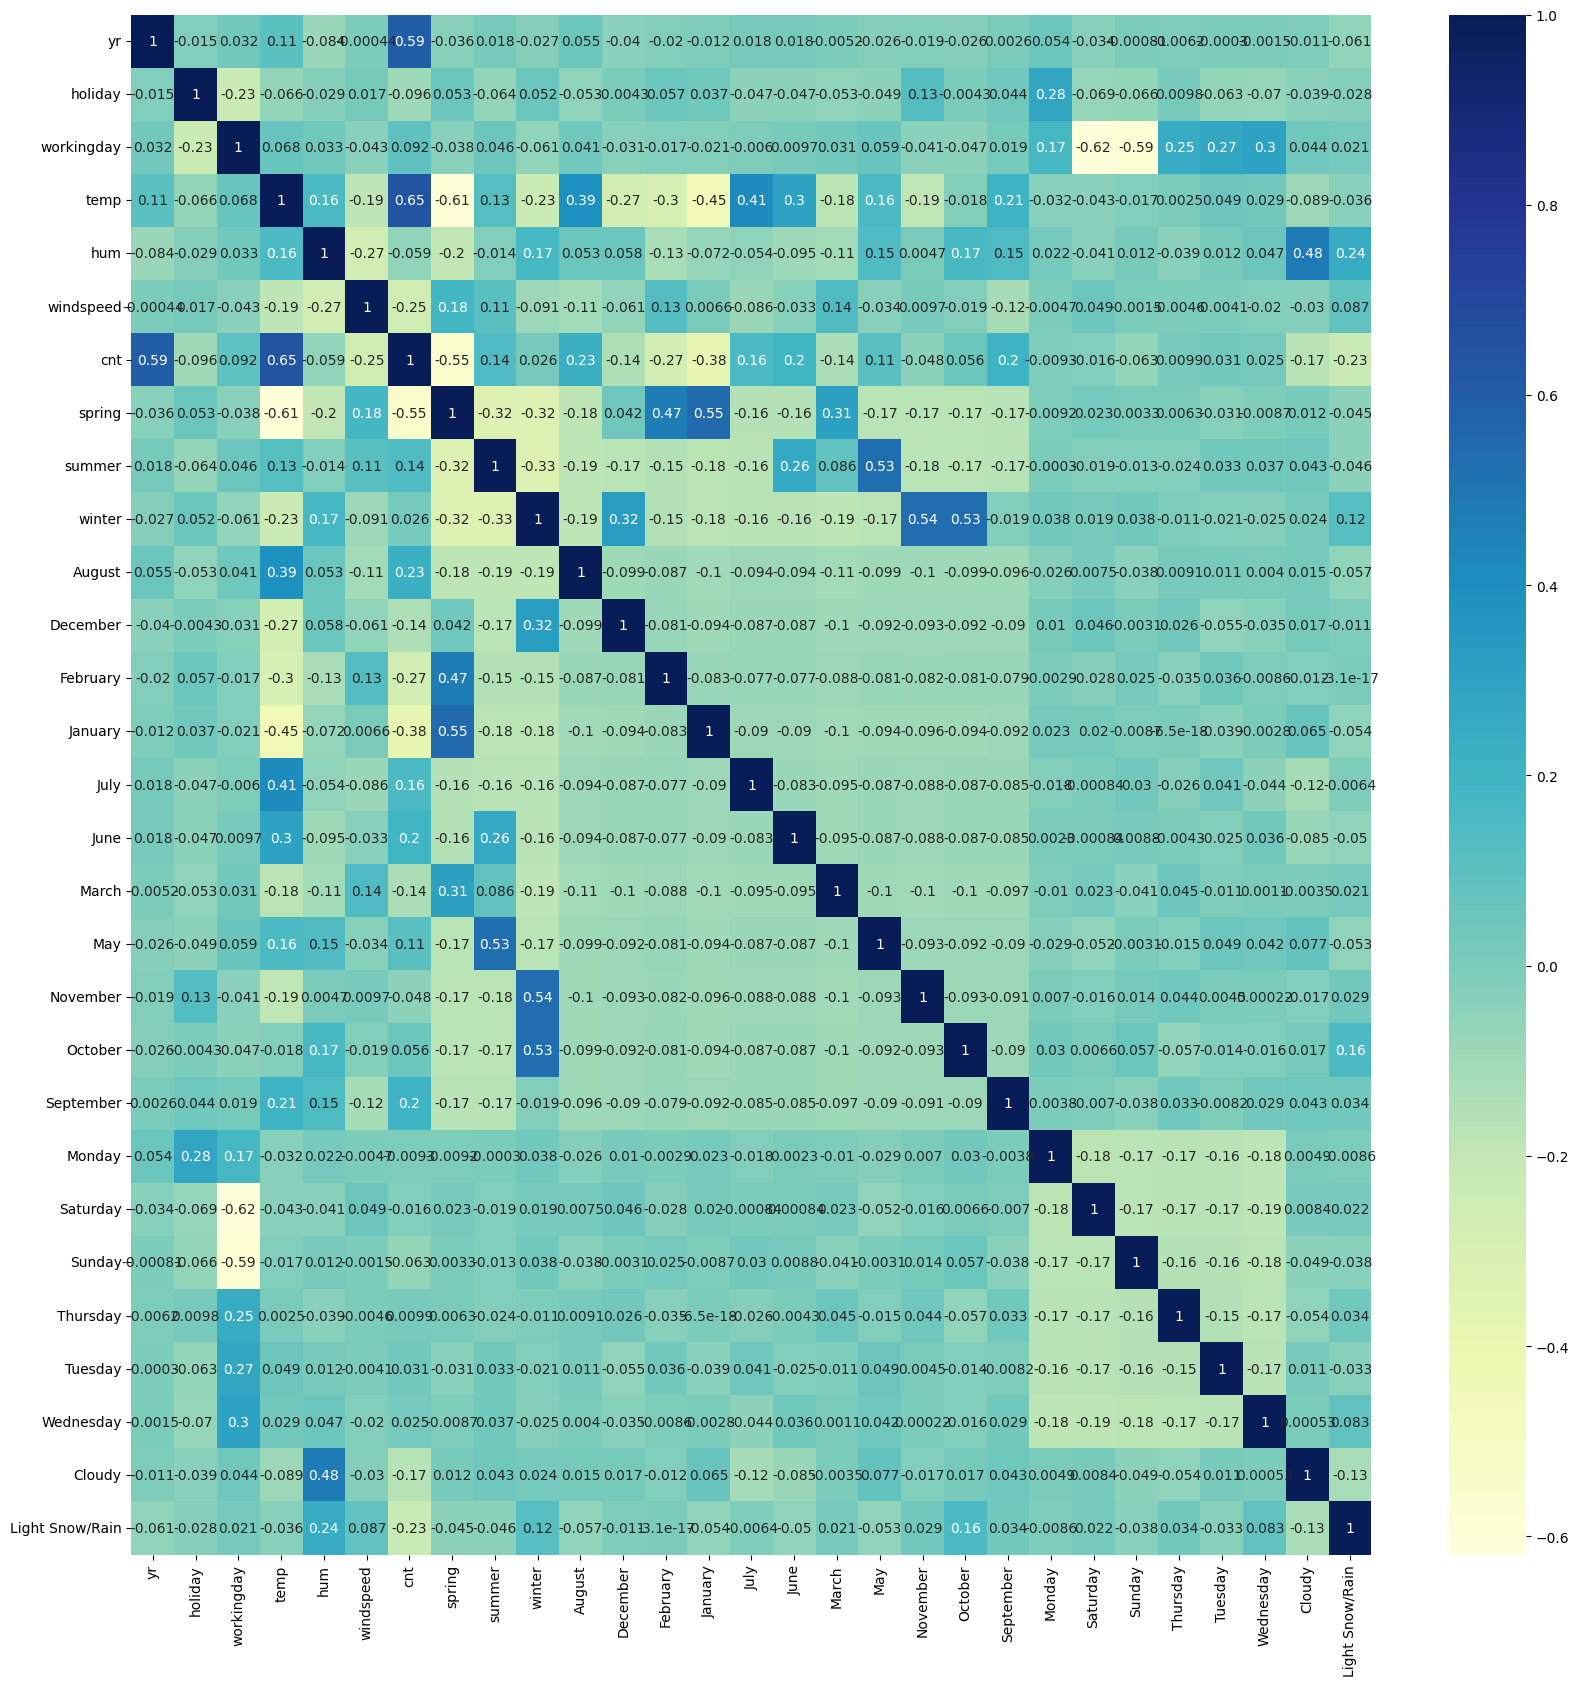

In [357]:
plt.figure(figsize=(20,20))
sns.heatmap(boomBikes_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

- Inference
  1.  `cnt` has strong positive corelation with `temp`
  2.  `cnt` has strong negative corelation with season `spring`


### 3.2 Creating X_train,y_train

In [358]:
y_train=boomBikes_train.pop('cnt')
X_train=boomBikes_train

In [359]:
y_train.shape

(510,)

In [360]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [361]:
X_train.shape

(510, 28)

In [362]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,August,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow/Rain
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### 3.3 Building Model

Choosing a Hyrbid approach to build Linear Regression Model.

#### 3.3.1 Recursive Feature Elimination(RFE)

In [363]:
#choosing 20 variables from 28 variables in the data set using RFE

lm=LinearRegression()
lm.fit(X_train,y_train)

rfe= RFE(lm, n_features_to_select=20) #running RFE
rfe=rfe.fit(X_train,y_train)

In [405]:
#checking Ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('spring', np.True_, np.int64(1)),
 ('summer', np.True_, np.int64(1)),
 ('winter', np.True_, np.int64(1)),
 ('August', np.True_, np.int64(1)),
 ('December', np.True_, np.int64(1)),
 ('February', np.True_, np.int64(1)),
 ('January', np.True_, np.int64(1)),
 ('July', np.True_, np.int64(1)),
 ('June', np.False_, np.int64(8)),
 ('March', np.False_, np.int64(9)),
 ('May', np.True_, np.int64(1)),
 ('November', np.True_, np.int64(1)),
 ('October', np.False_, np.int64(7)),
 ('September', np.True_, np.int64(1)),
 ('Monday', np.False_, np.int64(3)),
 ('Saturday', np.True_, np.int64(1)),
 ('Sunday', np.False_, np.int64(2)),
 ('Thursday', np.False_, np.int64(5)),
 ('Tuesday', np.False_, np.int64(4)),
 ('Wednesday', np.False_, np.int64(6)),
 ('Cloudy', np.True_, np.int64(1)),
 ('Light S

In [366]:
#choosing columns with rfe.support_ =True
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'August', 'December', 'February', 'January', 'July',
       'May', 'November', 'September', 'Saturday', 'Cloudy',
       'Light Snow/Rain'],
      dtype='object')

In [367]:
#dropped columns
X_train.columns[~rfe.support_]

Index(['June', 'March', 'October', 'Monday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

#### 3.3.2. Creating First Linear Regression Model(Model1)

In [368]:
#creating X_train_rfe using previous list of columns
X_train_rfe=X_train[col]

In [369]:
#adding constant 
X_train_rfe=sm.add_constant(X_train_rfe)

#creating first linear regression model
lr=sm.OLS(y_train,X_train_rfe)

#fit
lr_model=lr.fit()

#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.4
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          5.23e-188
Time:                        14:11:44   Log-Likelihood:                 525.61
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -920.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2887      0.041      7.108      0.000       0.209       0.368
yr                  0.2316      0.008     29.054      0.000       0.216       0.247
holiday            -0.0490      0.027     -1.817      0.070      -0.102       0.004
workingday          0.0439      0.011      3.837      0.000       0.021       0.066
temp                0.4509      0.038     11.761      0.000       0.376       0.526
hum                -0.1549      0.038     -4.117      0.000      -0.229      -0.081
windspeed          -0.1871      0.025     -7.359      0.000      -0.237      -0.137
spring             -0.0456      0.027     -1.717      0.087      -0.098       0.007
summer              0.0397      0.023      1.709      0.088      -0.006       0.085
winter              0.1090      0.023      4.814      0.000       0.065       0.154
August              0.0151      0.024      0.640      0.522      -0.031       0.061
December           -0.0480      0.018     -2.643      0.008      -0.084      -0.012
February           -0.0348      0.021     -1.626      0.105      -0.077       0.007
January            -0.0651      0.021     -3.066      0.002      -0.107      -0.023
July               -0.0403      0.025     -1.639      0.102      -0.089       0.008
May                 0.0232      0.017      1.343      0.180      -0.011       0.057
November           -0.0451      0.019     -2.395      0.017      -0.082      -0.008
September           0.0809      0.021      3.780      0.000       0.039       0.123
Saturday            0.0540      0.014      3.736      0.000       0.026       0.082
Cloudy             -0.0586      0.010     -5.671      0.000      -0.079      -0.038
Light Snow/Rain    -0.2541      0.026     -9.723      0.000      -0.305      -0.203
==============================================================================
Omnibus:                       81.837   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.129
Skew:                          -0.776   Prob(JB):                     1.07e-50
Kurtosis:                       5.902   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 3.3.2.1 Calculating VIF

In [370]:
#creating dataframe to store VIF values
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,108.23
7,spring,8.54
8,summer,6.59
9,winter,6.26
4,temp,4.91
10,August,3.17
14,July,2.80
13,January,2.38
17,September,2.22
5,hum,1.97


#### 3.3.5 Removing Insignificant Variables and Rebuilding Model 

##### 3.3.5.1 Model2

In [371]:
#removing 'August' as it has p value >0.05

X_train_new=X_train_rfe.drop('August',axis=1)


In [372]:
#adding constant 
X_train_sm=sm.add_constant(X_train_new)

#creating another linear regression model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          5.20e-189
Time:                        14:11:45   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2970      0.038      7.722      0.000       0.221       0.373
yr                  0.2318      0.008     29.103      0.000       0.216       0.247
holiday            -0.0492      0.027     -1.827      0.068      -0.102       0.004
workingday          0.0441      0.011      3.852      0.000       0.022       0.067
temp                0.4527      0.038     11.846      0.000       0.378       0.528
hum                -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed          -0.1873      0.025     -7.371      0.000      -0.237      -0.137
spring             -0.0553      0.022     -2.528      0.012      -0.098      -0.012
summer              0.0295      0.017      1.747      0.081      -0.004       0.063
winter              0.1001      0.018      5.618      0.000       0.065       0.135
December           -0.0488      0.018     -2.692      0.007      -0.084      -0.013
February           -0.0348      0.021     -1.626      0.105      -0.077       0.007
January            -0.0650      0.021     -3.067      0.002      -0.107      -0.023
July               -0.0510      0.018     -2.844      0.005      -0.086      -0.016
May                 0.0229      0.017      1.325      0.186      -0.011       0.057
November           -0.0461      0.019     -2.456      0.014      -0.083      -0.009
September           0.0723      0.017      4.349      0.000       0.040       0.105
Saturday            0.0544      0.014      3.774      0.000       0.026       0.083
Cloudy             -0.0583      0.010     -5.655      0.000      -0.079      -0.038
Light Snow/Rain    -0.2549      0.026     -9.773      0.000      -0.306      -0.204
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 3.3.5.2 Model3

In [373]:
#removing 'May' as it has p value >0.05

X_train_new=X_train_new.drop('May',axis=1)


In [374]:
#adding constant 
X_train_sm=sm.add_constant(X_train_new)

#creating another linear regression model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          9.80e-190
Time:                        14:11:45   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2868      0.038      7.605      0.000       0.213       0.361
yr                  0.2312      0.008     29.052      0.000       0.216       0.247
holiday            -0.0500      0.027     -1.855      0.064      -0.103       0.003
workingday          0.0442      0.011      3.860      0.000       0.022       0.067
temp                0.4616      0.038     12.262      0.000       0.388       0.536
hum                -0.1477      0.037     -3.958      0.000      -0.221      -0.074
windspeed          -0.1889      0.025     -7.441      0.000      -0.239      -0.139
spring             -0.0515      0.022     -2.373      0.018      -0.094      -0.009
summer              0.0393      0.015      2.586      0.010       0.009       0.069
winter              0.1021      0.018      5.752      0.000       0.067       0.137
December           -0.0474      0.018     -2.619      0.009      -0.083      -0.012
February           -0.0334      0.021     -1.562      0.119      -0.075       0.009
January            -0.0634      0.021     -2.991      0.003      -0.105      -0.022
July               -0.0515      0.018     -2.868      0.004      -0.087      -0.016
November           -0.0444      0.019     -2.371      0.018      -0.081      -0.008
September           0.0723      0.017      4.346      0.000       0.040       0.105
Saturday            0.0540      0.014      3.743      0.000       0.026       0.082
Cloudy             -0.0585      0.010     -5.668      0.000      -0.079      -0.038
Light Snow/Rain    -0.2567      0.026     -9.849      0.000      -0.308      -0.206
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.714
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 3.3.5.3 Model4

In [375]:
#removing 'February' as it has p value >0.05

X_train_new=X_train_new.drop('February',axis=1)


In [376]:
#adding constant 
X_train_sm=sm.add_constant(X_train_new)

#creating another linear regression model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          2.52e-190
Time:                        14:11:45   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2756      0.037      7.433      0.000       0.203       0.348
yr                  0.2309      0.008     28.978      0.000       0.215       0.247
holiday            -0.0520      0.027     -1.931      0.054      -0.105       0.001
workingday          0.0444      0.011      3.870      0.000       0.022       0.067
temp                0.4764      0.036     13.064      0.000       0.405       0.548
hum                -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed          -0.1879      0.025     -7.390      0.000      -0.238      -0.138
spring             -0.0607      0.021     -2.899      0.004      -0.102      -0.020
summer              0.0424      0.015      2.809      0.005       0.013       0.072
winter              0.1038      0.018      5.845      0.000       0.069       0.139
December           -0.0388      0.017     -2.248      0.025      -0.073      -0.005
January            -0.0455      0.018     -2.548      0.011      -0.081      -0.010
July               -0.0524      0.018     -2.916      0.004      -0.088      -0.017
November           -0.0399      0.019     -2.152      0.032      -0.076      -0.003
September           0.0737      0.017      4.430      0.000       0.041       0.106
Saturday            0.0548      0.014      3.794      0.000       0.026       0.083
Cloudy             -0.0583      0.010     -5.637      0.000      -0.079      -0.038
Light Snow/Rain    -0.2555      0.026     -9.791      0.000      -0.307      -0.204
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 3.3.5.4 Model5

In [377]:
#removing 'holiday' as it has p value >0.05

X_train_new=X_train_new.drop('holiday',axis=1)


In [378]:
#adding constant 
X_train_sm=sm.add_constant(X_train_new)

#creating another linear regression model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.20e-190
Time:                        14:11:45   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2690      0.037      7.267      0.000       0.196       0.342
yr                  0.2311      0.008     28.929      0.000       0.215       0.247
workingday          0.0521      0.011      4.826      0.000       0.031       0.073
temp                0.4744      0.037     12.978      0.000       0.403       0.546
hum                -0.1480      0.037     -3.952      0.000      -0.222      -0.074
windspeed          -0.1883      0.025     -7.386      0.000      -0.238      -0.138
spring             -0.0624      0.021     -2.974      0.003      -0.104      -0.021
summer              0.0421      0.015      2.783      0.006       0.012       0.072
winter              0.1038      0.018      5.832      0.000       0.069       0.139
December           -0.0398      0.017     -2.302      0.022      -0.074      -0.006
January            -0.0465      0.018     -2.596      0.010      -0.082      -0.011
July               -0.0514      0.018     -2.854      0.004      -0.087      -0.016
November           -0.0441      0.018     -2.390      0.017      -0.080      -0.008
September           0.0714      0.017      4.289      0.000       0.039       0.104
Saturday            0.0625      0.014      4.493      0.000       0.035       0.090
Cloudy             -0.0581      0.010     -5.607      0.000      -0.078      -0.038
Light Snow/Rain    -0.2552      0.026     -9.754      0.000      -0.307      -0.204
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 3.3.5.5 Model6

In [379]:
#removing 'December' as it has high p value 

X_train_new=X_train_new.drop('December',axis=1)

In [380]:
#adding constant 
X_train_sm=sm.add_constant(X_train_new)

#creating another linear regression model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.1
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.19e-190
Time:                        14:11:45   Log-Likelihood:                 518.57
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     494   BIC:                            -937.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2514      0.036      6.911      0.000       0.180       0.323
yr                  0.2308      0.008     28.771      0.000       0.215       0.247
workingday          0.0514      0.011      4.746      0.000       0.030       0.073
temp                0.5014      0.035     14.417      0.000       0.433       0.570
hum                -0.1567      0.037     -4.187      0.000      -0.230      -0.083
windspeed          -0.1850      0.026     -7.237      0.000      -0.235      -0.135
spring             -0.0567      0.021     -2.711      0.007      -0.098      -0.016
summer              0.0484      0.015      3.235      0.001       0.019       0.078
winter              0.0984      0.018      5.554      0.000       0.064       0.133
January            -0.0360      0.017     -2.068      0.039      -0.070      -0.002
July               -0.0522      0.018     -2.885      0.004      -0.088      -0.017
November           -0.0273      0.017     -1.605      0.109      -0.061       0.006
September           0.0766      0.017      4.627      0.000       0.044       0.109
Saturday            0.0612      0.014      4.381      0.000       0.034       0.089
Cloudy             -0.0563      0.010     -5.424      0.000      -0.077      -0.036
Light Snow/Rain    -0.2481      0.026     -9.508      0.000      -0.299      -0.197
==============================================================================
Omnibus:                       73.674   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.153
Skew:                          -0.729   Prob(JB):                     8.43e-42
Kurtosis:                       5.603   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 3.3.5.6 Model7

In [381]:
#removing 'December' as it has high p value 

X_train_new=X_train_new.drop('November',axis=1)

In [382]:
#adding constant 
X_train_sm=sm.add_constant(X_train_new)

#creating another linear regression model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.4
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          3.01e-191
Time:                        14:11:45   Log-Likelihood:                 517.24
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -941.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2428      0.036      6.737      0.000       0.172       0.314
yr                  0.2308      0.008     28.720      0.000       0.215       0.247
workingday          0.0520      0.011      4.795      0.000       0.031       0.073
temp                0.5094      0.034     14.775      0.000       0.442       0.577
hum                -0.1546      0.037     -4.128      0.000      -0.228      -0.081
windspeed          -0.1869      0.026     -7.310      0.000      -0.237      -0.137
spring             -0.0519      0.021     -2.502      0.013      -0.093      -0.011
summer              0.0510      0.015      3.429      0.001       0.022       0.080
winter              0.0922      0.017      5.324      0.000       0.058       0.126
January            -0.0352      0.017     -2.019      0.044      -0.069      -0.001
July               -0.0518      0.018     -2.857      0.004      -0.087      -0.016
September           0.0794      0.016      4.811      0.000       0.047       0.112
Saturday            0.0623      0.014      4.461      0.000       0.035       0.090
Cloudy             -0.0561      0.010     -5.394      0.000      -0.076      -0.036
Light Snow/Rain    -0.2467      0.026     -9.445      0.000      -0.298      -0.195
==============================================================================
Omnibus:                       73.357   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.156
Skew:                          -0.726   Prob(JB):                     1.39e-41
Kurtosis:                       5.597   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 3.3.5.7 Model8

In [383]:
#removing 'January' as it has high p value 

X_train_new=X_train_new.drop('January',axis=1)

In [384]:
#adding constant 
X_train_sm=sm.add_constant(X_train_new)

#creating another linear regression model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.54e-191
Time:                        14:11:45   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2307      0.036      6.472      0.000       0.161       0.301
yr                  0.2300      0.008     28.568      0.000       0.214       0.246
workingday          0.0518      0.011      4.764      0.000       0.030       0.073
temp                0.5278      0.033     15.827      0.000       0.462       0.593
hum                -0.1594      0.037     -4.253      0.000      -0.233      -0.086
windspeed          -0.1815      0.026     -7.114      0.000      -0.232      -0.131
spring             -0.0566      0.021     -2.740      0.006      -0.097      -0.016
summer              0.0541      0.015      3.640      0.000       0.025       0.083
winter              0.0983      0.017      5.738      0.000       0.065       0.132
July               -0.0535      0.018     -2.946      0.003      -0.089      -0.018
September           0.0799      0.017      4.831      0.000       0.047       0.112
Saturday            0.0619      0.014      4.420      0.000       0.034       0.089
Cloudy             -0.0561      0.010     -5.379      0.000      -0.077      -0.036
Light Snow/Rain    -0.2442      0.026     -9.330      0.000      -0.296      -0.193
==============================================================================
Omnibus:                       71.537   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.647
Skew:                          -0.709   Prob(JB):                     1.32e-40
Kurtosis:                       5.576   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3.3.6 Calculating VIF

In [385]:
#calculating VIF
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,81.14
6,spring,5.02
3,temp,3.62
8,winter,3.48
7,summer,2.62
4,hum,1.91
2,workingday,1.65
11,Saturday,1.64
12,Cloudy,1.57
9,July,1.49


In [386]:
#removing 'spring' as it has VIF >5  

X_train_new=X_train_new.drop('spring',axis=1)


In [387]:
#adding constant 
X_train_sm=sm.add_constant(X_train_new)

#creating another linear regression model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          4.14e-191
Time:                        14:11:45   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1712      0.028      6.014      0.000       0.115       0.227
yr                  0.2286      0.008     28.267      0.000       0.213       0.244
workingday          0.0524      0.011      4.791      0.000       0.031       0.074
temp                0.5960      0.022     26.667      0.000       0.552       0.640
hum                -0.1709      0.037     -4.558      0.000      -0.245      -0.097
windspeed          -0.1888      0.026     -7.393      0.000      -0.239      -0.139
summer              0.0827      0.011      7.770      0.000       0.062       0.104
winter              0.1355      0.010     12.930      0.000       0.115       0.156
July               -0.0439      0.018     -2.450      0.015      -0.079      -0.009
September           0.0928      0.016      5.816      0.000       0.061       0.124
Saturday            0.0625      0.014      4.429      0.000       0.035       0.090
Cloudy             -0.0536      0.010     -5.129      0.000      -0.074      -0.033
Light Snow/Rain    -0.2391      0.026     -9.100      0.000      -0.291      -0.188
==============================================================================
Omnibus:                       65.304   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.523
Skew:                          -0.689   Prob(JB):                     5.61e-33
Kurtosis:                       5.257   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [388]:
#calculating VIF
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,51.11
4,hum,1.88
2,workingday,1.65
10,Saturday,1.64
3,temp,1.60
11,Cloudy,1.56
8,July,1.43
6,summer,1.33
7,winter,1.29
12,Light Snow/Rain,1.24


- Now all VIF values <5

#### 3.3.7 Final Model & Final Variables

In [389]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          4.14e-191
Time:                        14:11:45   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1712      0.028      6.014      0.000       0.115       0.227
yr                  0.2286      0.008     28.267      0.000       0.213       0.244
workingday          0.0524      0.011      4.791      0.000       0.031       0.074
temp                0.5960      0.022     26.667      0.000       0.552       0.640
hum                -0.1709      0.037     -4.558      0.000      -0.245      -0.097
windspeed          -0.1888      0.026     -7.393      0.000      -0.239      -0.139
summer              0.0827      0.011      7.770      0.000       0.062       0.104
winter              0.1355      0.010     12.930      0.000       0.115       0.156
July               -0.0439      0.018     -2.450      0.015      -0.079      -0.009
September           0.0928      0.016      5.816      0.000       0.061       0.124
Saturday            0.0625      0.014      4.429      0.000       0.035       0.090
Cloudy             -0.0536      0.010     -5.129      0.000      -0.074      -0.033
Light Snow/Rain    -0.2391      0.026     -9.100      0.000      -0.291      -0.188
==============================================================================
Omnibus:                       65.304   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.523
Skew:                          -0.689   Prob(JB):                     5.61e-33
Kurtosis:                       5.257   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [390]:
#final variables
X_train_sm.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'July', 'September', 'Saturday', 'Cloudy', 'Light Snow/Rain'],
      dtype='object')

In [391]:
X_train_sm.shape

(510, 13)

## 4. Residual Analysis


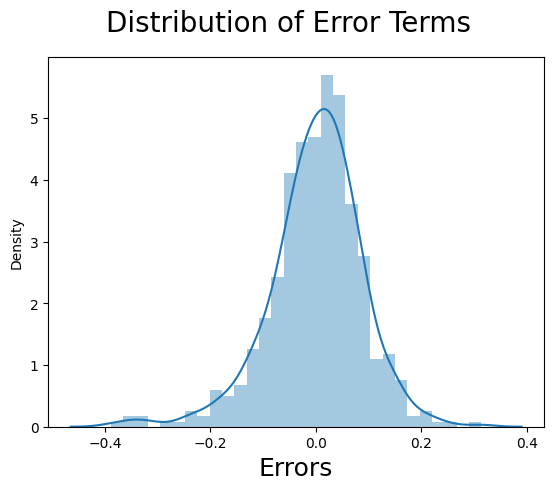

In [392]:
#Checking errors are normally distributed
y_train_pred=lr_model.predict(X_train_sm)
res=y_train - y_train_pred

sns.distplot(res,bins=30)
plt.suptitle('Distribution of Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18) 
plt.show()

## 5. Predictions and Evaluations 

#### 5.1 Rescaling Test Data Set

In [393]:

#create a list of numerical variables
numerical_columns=['temp','hum','windspeed','cnt']

#fit on data
boomBikes_test[numerical_columns]=scaler.transform(boomBikes_test[numerical_columns])


In [394]:
boomBikes_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow/Rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [395]:
boomBikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow/Rain
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


#### 5.2 Creating X_test, y_test

In [396]:
y_test=boomBikes_test.pop('cnt')
X_test=boomBikes_test

In [397]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: cnt, Length: 220, dtype: float64

In [398]:
#add a constant

X_test_sm=sm.add_constant(X_test)


In [399]:
X_test_sm

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow/Rain
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0,1,0.519232,0.756118,0.283397,0,0,1,...,0,0,0,0,0,0,1,0,0,0
127,1.0,0,0,0,0.584649,0.650923,0.069510,0,1,0,...,0,0,0,0,1,0,0,0,0,0
640,1.0,1,0,1,0.745598,0.817947,0.052115,0,0,1,...,1,0,0,0,0,0,0,1,1,0
72,1.0,0,0,1,0.331557,0.512107,0.203418,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [400]:
#Keeping only const and variables used in Final Model 
X_test_sm=X_test_sm[['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
                     'winter', 'July', 'September', 'Saturday', 'Cloudy', 'Light Snow/Rain']]

In [401]:
X_test_sm

,const,yr,workingday,temp,hum,windspeed,summer,winter,July,September,Saturday,Cloudy,Light Snow/Rain
184,1.0,0,0,0.831783,0.657364,0.084219,0,0,1,0,0,1,0
535,1.0,1,1,0.901354,0.610133,0.153728,1,0,0,0,0,0,0
299,1.0,0,1,0.511964,0.837699,0.334206,0,1,0,0,0,1,0
221,1.0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,1,0.519232,0.756118,0.283397,0,1,0,0,0,0,0
127,1.0,0,0,0.584649,0.650923,0.069510,1,0,0,0,0,0,0
640,1.0,1,1,0.745598,0.817947,0.052115,0,1,0,0,0,1,0
72,1.0,0,1,0.331557,0.512107,0.203418,0,0,0,0,0,0,0


#### 5.3 Prediction 

In [402]:
#predict using X_test_sm
y_test_pred=lr_model.predict(X_test_sm)


#### 5.4 Evaluatation

In [403]:
#calculating r2 score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8069504602915928

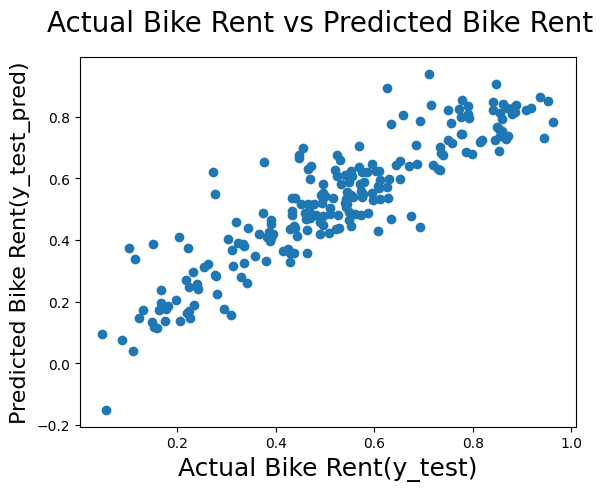

In [404]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual Bike Rent vs Predicted Bike Rent', fontsize=20)     # Plot heading 
plt.xlabel('Actual Bike Rent(y_test)', fontsize=18)                                # X-label
plt.ylabel('Predicted Bike Rent(y_test_pred)', fontsize=16)                        # Y-label
plt.show()


#### 5.5 Conclusion 

- The equation of best fitted line is :

 `cnt`=0.1712+ 0.2286x `yr`+ 0.0524x `workingday`+ 0.5960x `temp`-0.1709 x `hum`-0.1888 x `windspeed`+0.0827 x `summer`+0.1355 x`winter`-0.0439 x `July`+0.0928 x `September`+0.0625 x `Saturday`-0.0536 x `Cloudy`-0.2391 x `Light Snow/Rain` 